# Градиентный спуск

**Градиент функции** — это вектор, координаты которого равны частным производным по соответствующим аргументам, вычисленным в данной точке.

Рассмотрим функцию двух переменных $f(x, y)$.\
**Градиентом функции** двух переменных $f(x, y)$ будет вектор $\nabla{f} = \left(\cfrac{df}{dx}, \cfrac{df}{dy}\right)$.\
Производные $\cfrac{df}{dx}$ и $\cfrac{df}{dy}$ вычисляются в каждой точке $(x, y)$.\
Таким образом, градиент задан в каждой точке и будет меняться от точки к точке.

В данной точке градиент будет показывать направление наибольшего возрастания функции.\
Модуль градиента совпадает с максимальной скоростью возрастания функции в данной точке.

Функция, для которой мы будем искать экстремум, в машинном обучении называется **целевой функцией (objective function)**.\
Задача по нахождению экстремума функции называется **задачей оптимизации**.\
Если речь идет о поиске минимума, то употребляют термины **функция стоимости (cost function)**, **функция потерь (loss function)**, **функция ошибок (error function)**.

Если функция дифференцируема, то найти точки, подозрительные на экстремум, можно с помощью необходимого условия экстремума:\
все частные производные должны равняться нулю, а значит, вектор градиента – нулевому вектору.

Но не всегда задачу можно решать аналитически.\
В таком случае используется численная оптимизация.\
Наиболее простым в реализации из всех методов численной оптимизации является **метод градиентного спуска**.

**Градиентный спуск** – итерационный метод. Основная идея градиентного спуска состоит в том, чтобы двигаться к минимуму в направлении наиболее быстрого убывания функции потерь, которое определяется антиградиентом.

Алгоритм градиентного спуска:
- $x_0 = [c_1, \dots, c_n]$
- пока расстояние между $x_t$ и $x_{t−1}$ больше $\varepsilon$, повторять $x_{t+1} = x_t − \alpha \cdot \nabla f(x_t)$.

<img src="./img/st_10_image1.jpg" width="500"/>

Параметры алгоритма градиентного спуска:
- стартовая точка
- коэффициент скорости обучения $\alpha$
- $\varepsilon$ - порог / критерий останова

Градиентный спуск можно применять **для гладких выпуклых функций**.\
Выпуклость гарантирует существование лишь одного минимума, а гладкость – существование вектора градиента в каждой точке.  

**Гладкой** или **непрерывно дифференцируемой функцией** называют функцию, имеющую непрерывную производную на всем множестве определения.  

<img src="./img/006_700.png" width="600"/>

**Выпуклой** (или **выпуклой вниз**) функцией называют функцию, для которой отрезок между любыми двумя точками ее графика в векторном пространстве лежит не ниже соответствующей дуги графика.  

<img src="./img/007_400.png" width="300"/>

<img src="./img/008.1_400.png" width="350"/>

При решении задачи оптимизации нужно найти минимум функции.\
**Локальный минимум** функции – это когда значение функции минимально в некоторой окрестности точки.\
**Глобальный минимум** – это когда значение функции является минимальным среди всех её возможных значений.  

<img src="./img/011_700.png" width="600"/>

## Градиентный спуск в линейной регрессии

Квадратичная функция потерь $MSE$ хорошо подходит для оптимизации методом градиентного спуска и применяется для нахождения коэффициентов в задачах линейной регрессии.

Функция однофакторной линейной регрессии – это прямая $\hat{y} = a + b x$, которая проходит максимально близко к эмпирическим точкам.

Функция потерь $MSE = \cfrac{\sum{(y-\hat{y})^2}}{n}$

Необходимо минимизировать функцию:\
$\displaystyle F(a,b) = \sum_{i=1}^{n}{(y_i - \hat{y_i})^2} = \sum_{i=1}^{n}{(a + b x_i - y_i)^2}$

Для нахождения минимума нужны частные производные:\
$\displaystyle \cfrac{\partial{F}}{\partial{a}} = 2\sum_{i=1}^{n}{(a + b x_i - y_i)}$ \
$\displaystyle \cfrac{\partial{F}}{\partial{b}} = 2\sum_{i=1}^{n}{(a + b x_i - y_i)x_i}$

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sympy import diff
from sympy.abc import a,b,x,y

import warnings
warnings.filterwarnings('ignore')

In [2]:
# функция
f = (a + b * x - y)**2

In [3]:
# частная производная функции по a
diff(f, a)

2*a + 2*b*x - 2*y

In [4]:
# частная производная функции по b
diff(f, b)

2*x*(a + b*x - y)

In [5]:
# датасет
df = pd.DataFrame({'X': [12,   9,   8, 14, 15, 11, 10, 15],
                   'Y': [42, 107, 100, 60, 78, 79, 90 ,54]})

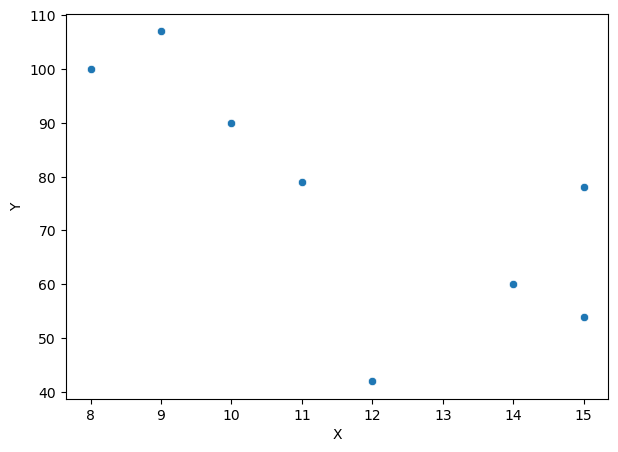

In [6]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='X', y='Y');

In [7]:
# функция потерь
def mse(a, b, x, y):
    return np.sum((a + b*x - y)**2)

# частная производная функции потерь по a
def mse_pa(a, b, x, y):
    return 2 * np.sum(a + b*x - y)

# частная производная функции потерь по b
def mse_pb(a, b, x, y):
    return 2 * np.sum((a + b*x - y)*x)

In [8]:
X = df['X'].values
Y = df['Y'].values
n = df.shape[0]

In [9]:
%%time
lr = 1e-5    # learning rate
# th = 0.0001  # threshold
a = 0
b = 0
mse_min = mse(a,b,X,Y)

for i in range(2*10**6):
    a -= lr * mse_pa(a,b,X,Y)
    b -= lr * mse_pb(a,b,X,Y)
    mse_next = mse(a,b,X,Y)
    if not i%(1*10**5):
        print(f'{i:>8}: a = {a:<20} b = {b:<20}  mse = {mse_next/n}')
    if mse_next > mse_min:
        print(f'\nМинимум\n{i_min}: a = {a_min}  b = {b_min}  mse = {mse_min/n}\n')
        break
    else:
        mse_min = mse_next
        i_min, a_min, b_min = i, a, b

       0: a = 0.0122               b = 0.13709706400000002   mse = 6035.160551788596
  100000: a = 74.9995314663167     b = -0.16602164745538592  mse = 452.6838302231339
  200000: a = 111.70124260686227   b = -3.15131018056983     mse = 276.19429207517686
  300000: a = 129.77740561791794   b = -4.621611168798081    mse = 233.38295032022643
  400000: a = 138.68019676983243   b = -5.34575725116323     mse = 222.99813656813762
  500000: a = 143.06495974448737   b = -5.702410448572362    mse = 220.4790761452487
  600000: a = 145.2245236403238    b = -5.878067690003988    mse = 219.8680237406865
  700000: a = 146.28814241451045   b = -5.964581610786184    mse = 219.719799808569
  800000: a = 146.81199118739949   b = -6.007191061032344    mse = 219.68384489882905
  900000: a = 147.0699948476535    b = -6.028176877347788    mse = 219.67512326045437
 1000000: a = 147.19706565921268   b = -6.0385127179626386   mse = 219.6730076390694
 1100000: a = 147.25965000834384   b = -6.0436032800647235   

In [10]:
df['yhat1'] = np.round(a_min + b_min * df['X'],0)

In [11]:
model = LinearRegression()

X = df[['X']].values
Y = df['Y'].values

reg = model.fit(X,Y)
# reg.intercept_, reg.coef_[0]

In [12]:
print(f"LinearRegression:\ta={reg.intercept_}\tb={reg.coef_[0]}\nGradientDescent:\ta={a_min}\tb={b_min}")

LinearRegression:	a=147.3203883495146	b=-6.048543689320389
GradientDescent:	a=147.31977259728228	b=-6.0484936045144995


In [13]:
df['yhat2'] = reg.predict(X).round(0)

In [14]:
print(f"LinearRegression:\tMSE={mean_squared_error(Y, df['yhat2'])}\nGradientDescent:\tMSE={mse_min/n}")

LinearRegression:	MSE=219.75
GradientDescent:	MSE=219.67233011397852


In [15]:
df

,X,Y,yhat1,yhat2
0,12,42,75.0,75.0
1,9,107,93.0,93.0
2,8,100,99.0,99.0
3,14,60,63.0,63.0
4,15,78,57.0,57.0
5,11,79,81.0,81.0
6,10,90,87.0,87.0
7,15,54,57.0,57.0


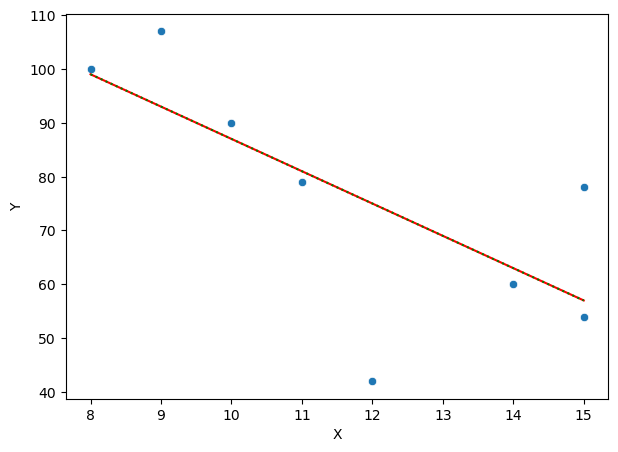

In [16]:
plt.figure(figsize=(7,5))

sns.scatterplot(data=df, x='X', y='Y')
sns.lineplot(data=df, x='X', y='yhat1', color='r')
sns.lineplot(data=df, x='X', y='yhat2', color='g', linestyle=':');

## Модификации градинтного спуска

В нейронных сетях используется функция потерь, которую мы стараемся минимизировать.\
С помощью градиентного спуска рассчитываем веса на каждом этапе обучения.

Минусы градиентного спуска:
1. Градиентный спуск проходит по всем данным, что затратно по времени и ресурсам
2. Фиксированные lerning rate, может попасть в локальный минимум и застрять там


### Стохастический градиентый спуск (Stochastic Gradient Descent)

<img src="./img/21_4_5cc6153d0c.png" width="750"/>

SGD успешно применяется для решения крупномасштабных и разреженных задач машинного обучения, часто встречающихся в классификации текстов и обработке естественного языка.

Использует batch (пакеты).\
Берет случайным образом небольшое подмножество данных (batch) и на нем обучается, т.е. вычисляется функция потерь.\
Обновляются параметры и шаг повторяется.\
Обрабатывает и обновляет парамметры по мере поступления данных.

`+` Выигрываем в скорости\
`+` Позволяет не хранить весь набор данных в оперативной памяти

`-` Чувствителен и не устойчив к выбросам и начальным значениям параметров\
`-` Может застрять в локальном минимуме\
`-` Если не достаточно хорошо очищены данные можем не достичь требуемого уровня точности (сходимости)

### Стохастический градиентый спуск с импульсом (Stochastic Gridient Descent with momentum)

Призвана помочь в решении проблемы попадания в локальные минимумы при оптимизации невыпуклых функций.

<img src="./img/Annotation 2025-05-22 230758.png" width="750"/>

<font color = '' size = '5'>$x_{k+1} = x_k - \alpha_k \nabla f(x_k) +$</font><font color = 'red' size = '5'>$\beta_k(x_k-x_{k-1})$</font>

На каждой новой итерации оптимизации используется скользящее среднее градиента.\
Движение в направлении среднего прошлых градиентов добавляет в алгоритм оптимизации эффект импульса, что позволяет скорректировать направление очередного шага, относительно исторически доминирующего направления.\
Для этих целей достаточно использовать приближенное скользящее среднее и не хранить все предыдущие значения градиентов.

`-` может "перескочить" глобальный минимум\
`-` если данные не однородны, можем двигаться не в ту сторону\
`-` нужно настраивать 2 гиперпараметра: скорость обучения и импульс ==> больше вычислений

### Accelerated Gradient Descent (Nesterov Momentum)

Модификация моментум, которая считает градиент не в текущей точке, а в точке, в которую мы бы пошли, следуя импульсу.

<img src="./img/Annotation 2025-05-23 214232.png" width="900"/>

<font color = '' size = '5'>$\upsilon_{k+1} = \beta_k \upsilon_k - \alpha_k \nabla f$</font><font color = 'red' size = '5'>$(x_k + \beta_k \upsilon_k)$</font>

<font color = '' size = '5'>$x_{k+1} = x_k + \upsilon_{k+1}$</font>

`+` позволяет значительно повысить устойчивость и скорость сходимости в некоторых случаях

`-` нужно настраивать 2 гиперпараметра: скорость обучения и импульс ==> больше вычислений

<img src="./img/optimizers.gif" width=""/>

[Оптимизация в ML](https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml?utm_s=)

[Оптимизаторы градиентных алгоритмов](https://proproprogs.ru/ml/ml-optimizatory-gradientnyh-algoritmov-rmsprop-adadelta-adam-nadam)